In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
df = pd.read_csv('data/food_orders_new_delhi.csv')
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


In [89]:
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


Convert "Order Date and Time", "Delivery Date and Time" to a datetime

In [91]:
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


Convert “Discounts and Offers” to a consistent numeric value (if applicable) or calculate the discount amounts

In [92]:
# List values in the 'Discounts and Offers' column
df['Discounts and Offers'].unique()

array(['5% on App', '10%', '15% New User', nan, '50 off Promo'],
      dtype=object)

In [93]:
# Count the number of each value in the 'Discounts and Offers' column
df['Discounts and Offers'].value_counts()

Discounts and Offers
10%             233
50 off Promo    201
15% New User    198
5% on App       183
Name: count, dtype: int64

<Axes: xlabel='Discounts and Offers'>

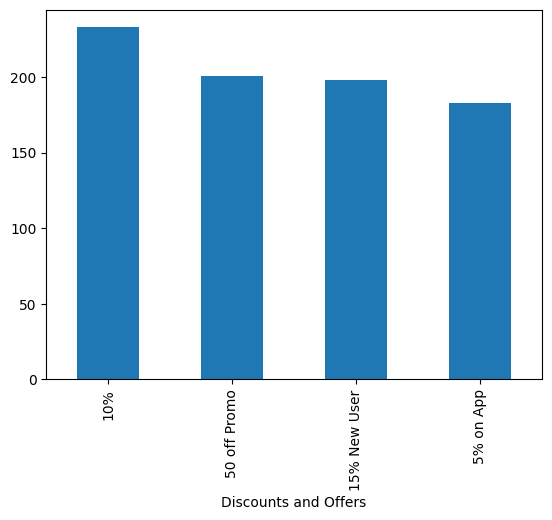

In [94]:
# Visualize the number of each value in the 'Discounts and Offers' column
df['Discounts and Offers'].value_counts().plot(kind='bar')

In [95]:
# nan to 0
df['Discounts and Offers'] = df['Discounts and Offers'].fillna(0)

In [96]:
def clean_discounts_and_offers(discount, order_value):
    if discount == 0:
        return 0, 0
    elif 'off' in discount:
        return 0, int(discount.split(' ')[0])
    elif '%' in discount:
        return int(discount.split('%')[0]), order_value * int(discount.split('%')[0]) / 100

In [97]:
# Clean the 'Discounts and Offers' column
df['Discount Percentage'], df['Discount Amount'] = zip(*df.apply(lambda x: clean_discounts_and_offers(x['Discounts and Offers'], x['Order Value']), axis=1))
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0,0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,5,41.25
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0,0,0.00
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,31,0,0,0.00
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,15,212.10


Description:
* Revenue: Commission Fee
* Total costs: Delivery, Payment Fee, Discount

In [98]:
df['Revenue'] = df['Commission Fee']
df['Costs'] = df['Delivery Fee'] + df['Discount Amount'] + df['Payment Processing Fee']
df['Profit'] = df['Revenue'] - df['Costs']
df['Rate of Commission'] = df['Commission Fee'] / df['Order Value']
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Revenue,Costs,Profit,Rate of Commission
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5,95.70,150,142.70,7.30,0.078370
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10,98.60,198,161.60,36.40,0.200811
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15,140.55,195,215.55,-20.55,0.208111
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0,0,0.00,146,77.00,69.00,0.099795
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0,50.00,130,130.00,0.00,0.065261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,5,41.25,165,88.25,76.75,0.200000
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0,0,0.00,110,92.00,18.00,0.067609
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,31,0,0,0.00,64,51.00,13.00,0.115732
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,15,212.10,199,246.10,-47.10,0.140736


In [99]:
Total_Revenue = df['Revenue'].sum()
Total_Costs = df['Costs'].sum()
Total_Profit = df['Profit'].sum()
Total_Orders = df.shape[0]
Total_Customers = df['Customer ID'].nunique()
Total_Restaurants = df['Restaurant ID'].nunique()

print(f'Total Revenue: {Total_Revenue}')
print(f'Total Costs: {Total_Costs}')
print(f'Total Profit: {Total_Profit}')
print(f'Total Orders: {Total_Orders}')
print(f'Total Customers: {Total_Customers}')
print(f'Total Restaurants: {Total_Restaurants}')

Total Revenue: 126990
Total Costs: 132741.84999999998
Total Profit: -5751.85
Total Orders: 1000
Total Customers: 947
Total Restaurants: 621


Profit < 0 -> Increase commissions or reduce promotions

In [100]:
# Profit Qualitative -> Profit or Loss
df['Profit Qualitative'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else 'Loss')
print(df['Profit Qualitative'].value_counts())

Profit Qualitative
Profit    537
Loss      463
Name: count, dtype: int64


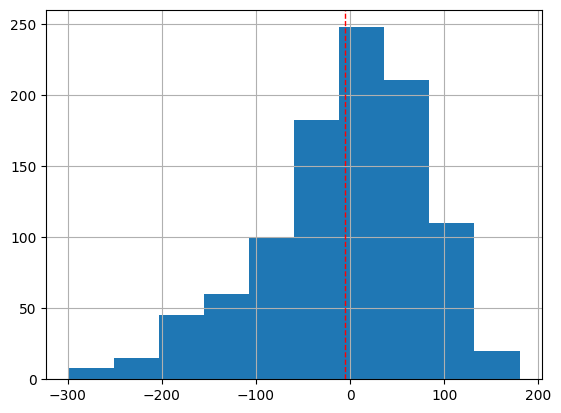

In [101]:
# histogram of the 'Profit' column and show the mean profit
df['Profit'].hist()
plt.axvline(df['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

In [102]:
# Distribution of Costs from Payment Processing Fee, Delivery Fee, and Discount Amount
total_payment_fee = df['Payment Processing Fee'].sum()
total_delivery_fee = df['Delivery Fee'].sum()
total_discount_amount = df['Discount Amount'].sum()

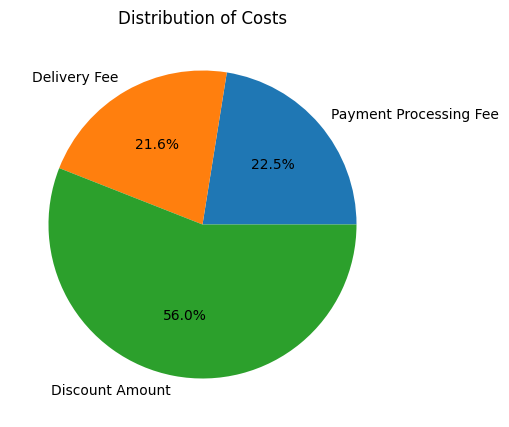

In [103]:
plt.figure(figsize=(10, 5))
plt.pie([total_payment_fee, total_delivery_fee, total_discount_amount], labels=['Payment Processing Fee', 'Delivery Fee', 'Discount Amount'], autopct='%1.1f%%')
plt.title('Distribution of Costs')
plt.show()

In [104]:
# Rate of Discount on Order Value
df['Rate of Discount'] = df['Discount Amount'] / df['Order Value']

In [105]:
# EDA - Order 'loss'
df_Loss = df[df['Profit Qualitative'] == 'Loss']

# Drop qualitative column
df_Loss = df_Loss.drop(columns=['Profit Qualitative'])
df_Loss

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Revenue,Costs,Profit,Rate of Commission,Rate of Discount
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15,140.55,195,215.55,-20.55,0.208111,0.150000
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0,50.00,130,130.00,0.00,0.065261,0.025100
8,9,C6578,R2877,2024-01-02 18:29:59,2024-01-02 20:23:59,1663,40,Cash on Delivery,5% on App,116,48,0,5,83.15,116,171.15,-55.15,0.069753,0.050000
11,12,C1769,R2992,2024-01-09 17:15:15,2024-01-09 17:55:15,1800,20,Credit Card,15% New User,61,36,0,15,270.00,61,326.00,-265.00,0.033889,0.150000
13,14,C3433,R2054,2024-02-04 18:48:54,2024-02-04 20:28:54,633,30,Digital Wallet,15% New User,51,14,50,15,94.95,51,138.95,-87.95,0.080569,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,992,C1768,R2503,2024-01-04 03:00:40,2024-01-04 04:23:40,948,40,Digital Wallet,10%,110,18,0,10,94.80,110,152.80,-42.80,0.116034,0.100000
993,994,C7645,R2984,2024-01-28 21:10:29,2024-01-28 21:49:29,1078,0,Digital Wallet,50 off Promo,57,50,0,0,50.00,57,100.00,-43.00,0.052876,0.046382
994,995,C6083,R2083,2024-01-07 13:14:48,2024-01-07 14:16:48,515,50,Cash on Delivery,5% on App,65,37,0,5,25.75,65,112.75,-47.75,0.126214,0.050000
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,15,212.10,199,246.10,-47.10,0.140736,0.150000


In [106]:
# EDA - Order 'profit'
df_Profit = df[df['Profit Qualitative'] == 'Profit']

# Drop qualitative column
df_Profit = df_Profit.drop(columns=['Profit Qualitative'])
df_Profit

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Revenue,Costs,Profit,Rate of Commission,Rate of Discount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5,95.70,150,142.70,7.30,0.078370,0.050000
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10,98.60,198,161.60,36.40,0.200811,0.100000
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0,0,0.00,146,77.00,69.00,0.099795,0.000000
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10,43.90,92,90.90,1.10,0.209567,0.100000
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5,15.15,144,57.15,86.85,0.475248,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,C8186,R2622,2024-01-09 17:54:38,2024-01-09 18:42:38,1058,50,Credit Card,5% on App,182,45,0,5,52.90,182,147.90,34.10,0.172023,0.050000
992,993,C6490,R2230,2024-01-18 01:39:24,2024-01-18 03:17:24,908,30,Digital Wallet,50 off Promo,138,45,0,0,50.00,138,125.00,13.00,0.151982,0.055066
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,5,41.25,165,88.25,76.75,0.200000,0.050000
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0,0,0.00,110,92.00,18.00,0.067609,0.000000


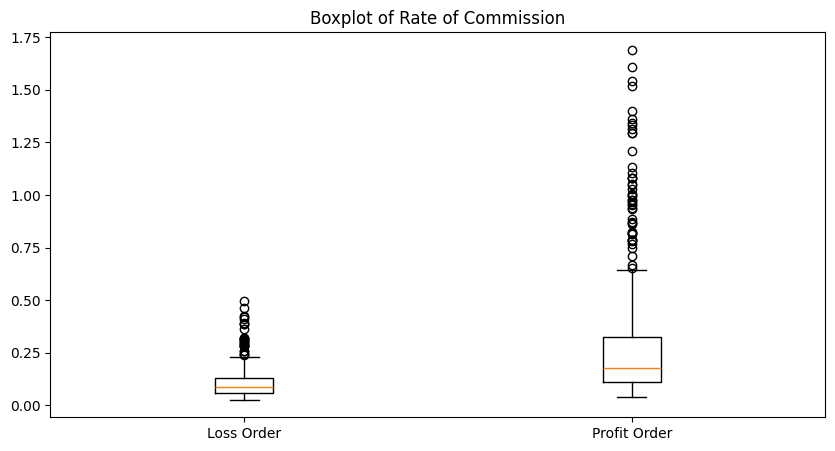

In [107]:
# Boxplot of Rate of Commission -> Loss Order and Profit Order
plt.figure(figsize=(10, 5))
plt.boxplot([df_Loss['Rate of Commission'], df_Profit['Rate of Commission']], labels=['Loss Order', 'Profit Order'])
plt.title('Boxplot of Rate of Commission')
plt.show()

In [108]:
print('Average Rate of Commission:', df['Rate of Commission'].mean())
print('Loss Order:')
print('Min ', df_Loss['Rate of Commission'].min())
print('Max ', df_Loss['Rate of Commission'].max())
print('Avg ', df_Loss['Rate of Commission'].mean())
print('Profit Order:')
print('Min ', df_Profit['Rate of Commission'].min())
print('Max ', df_Profit['Rate of Commission'].max())
print('Avg ', df_Profit['Rate of Commission'].mean())

Average Rate of Commission: 0.19750890168545332
Loss Order:
Min  0.02606516290726817
Max  0.4967741935483871
Avg  0.10523724813014154
Profit Order:
Min  0.03711790393013101
Max  1.690909090909091
Avg  0.27706528082159737


=> Increase: The commission rate on the order value, at least the same as the average rate for 'profit' orders

<Axes: xlabel='Discounts and Offers'>

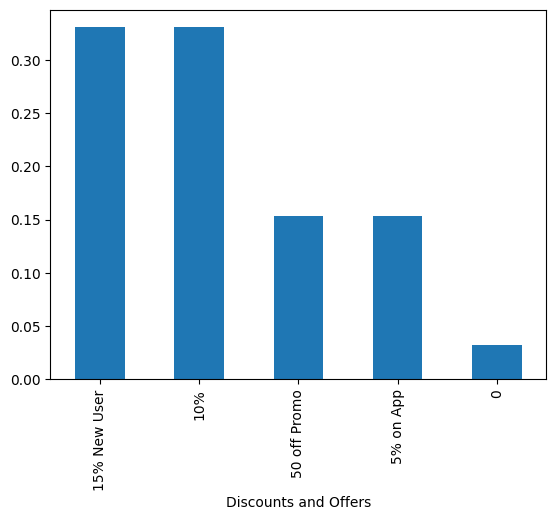

In [109]:
df_Loss['Discounts and Offers'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='Discounts and Offers'>

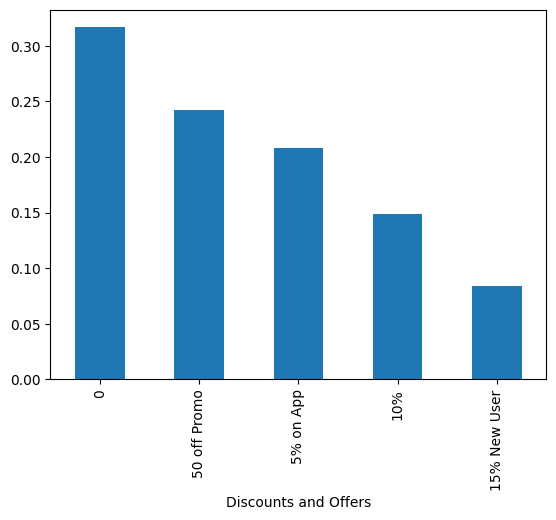

In [110]:
df_Profit['Discounts and Offers'].value_counts(normalize=True).plot(kind='bar')

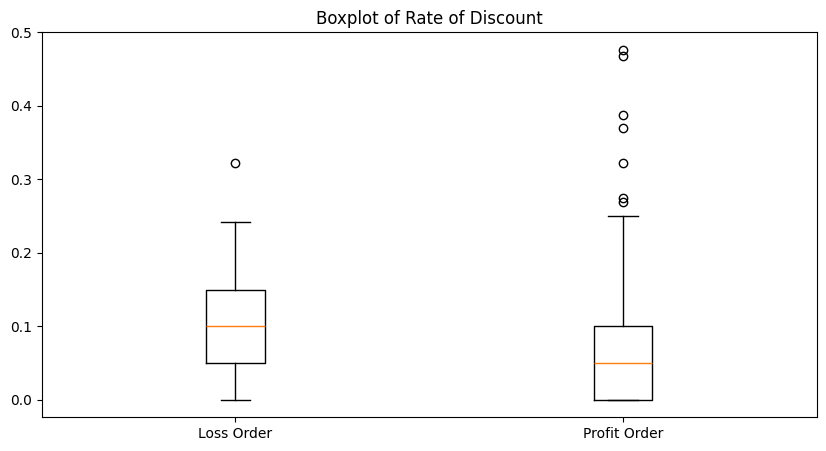

In [111]:
# Boxplot of Rate of Discount -> Loss Order and Profit Order
plt.figure(figsize=(10, 5))
plt.boxplot([df_Loss['Rate of Discount'], df_Profit['Rate of Discount']], labels=['Loss Order', 'Profit Order'])
plt.title('Boxplot of Rate of Discount')
plt.show() 

In [112]:
print('Average Rate of Discount:', df['Rate of Discount'].mean())
print('Loss Order:')
print('Min ', df_Loss['Rate of Discount'].min())
print('Max ', df_Loss['Rate of Discount'].max())
print('Avg ', df_Loss['Rate of Discount'].mean())
print('Profit Order:')
print('Min ', df_Profit['Rate of Discount'].min())
print('Max ', df_Profit['Rate of Discount'].max())
print('Avg ', df_Profit['Rate of Discount'].mean())

Average Rate of Discount: 0.07654611398579499
Loss Order:
Min  0.0
Max  0.3225806451612903
Avg  0.10010103740581448
Profit Order:
Min  0.0
Max  0.47619047619047616
Avg  0.05623712042253798


=> Discount: Discount rate on order value, maximum equal to the average rate for "profit" orders

In [113]:
# Export data to csv
df.to_csv('data/food_orders_new_delhi_cleaned.csv', index=False)